# Diagnostic Wisconsin Breast Cancer Database

In [1]:
# did you use all of these?

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

## Dataset Review

Breast cancer is the second most common cancer after lung cancer, and affects about 1 in 8 women during their lifetimes ([Paithankar](https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d), 2022). The best tool against breast cancer is early diagnosis, but this is notoriously difficult, and even then there can be significant variation in patient prognoses ([Mohammad et al](https://www.hindawi.com/journals/abb/2022/6187275/), 2022). With this, there has been a large amount of academic literature dedicated to improving early detection models using machine-learning and algorithms on existing datasets.

The Wisconsin dataset consists of 569 results from Fine Needle Aspiration (FNA) examinations on patients presenting with possible breast cancer symptoms. The FNA examination is defined by the American Cancer Society as "a small amount of breast tissue or fluid... removed from a suspicious area with a thin, hollow needle and checked for cancer cells" ([ACS](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html), 2022). Each sample is then analysed by medical imaging software to produce the data seen below. The data was collected by Dr. William Wolberg of Wisconsin Hospital, while the images were converted into a digital format by William Street, a computer science researcher at the University of Wisconsin ([Mohammad et al](https://www.hindawi.com/journals/abb/2022/6187275/), 2022).

In [2]:
# import the data using pandas' read_csv function
# drop the id column which is of no use to us, then drop a final 
# column of blank data (soluntion from BTech Geeks link in README)

df = pd.read_csv('data.csv')
df = df.drop(['id'],axis=1).drop(columns=df.columns[-1], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Each result consists of 32 attributes, starting with a unique whole-number ID (which I removed above) and an initial diagnosis item, which is a boolean (malignant/benign). These are followed by ten variables, where all descriptions are taken from [Sumbria](https://medium.com/analytics-vidhya/breast-cancer-diagnostic-dataset-eda-fa0de80f15bd) (2021): 
 - <i>radius</i>: "mean of distances from the center to points on the perimeter";
 - <i>texture</i>: "standard deviation of gray-scale values";
 - <i>perimeter</i>;
 - <i>area</i>;
 - <i>smoothness</i>: "local variation in radius lengths";
 - <i>compactness</i>: "perimeter$^2$ / area - 1.0";
 - <i>concavity</i>: "severity of concave portions of the contour";
 - <i>concave points</i>: "number of concave portions of the contour";
 - <i>symmetry</i>;
 - <i>fractal dimension</i>: "coastline approximation - 1".

For each of these, there is a mean, standard error and 'worst' value, which is in fact the mean of exclusively the largest three values ([Kalshtein](https://rpubs.com/Yael_K/329390), 2017). We can use Pandas' `describe` function to show a summary of each of these 30 numerical columns.

In [3]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Of these, the radius, texture, perimeter and area are real values that track size, while the remaining items seem to be determined on a scale largely between 0 and 1. I'll be referring the former of these items as 'spatial' values for the duration of this analysis.

Ultimately, the piece of information that needs to be predicted with accuracy, and undoubtedly the most important piece of information from any perspective, is that of the diagnosis. In the existing data, there are 357 benign diagnoses, leaving 212 malignant cases in the data ([Paithankar](https://medium.com/swlh/breast-cancer-classification-using-python-e83719e5f97d), 2022).

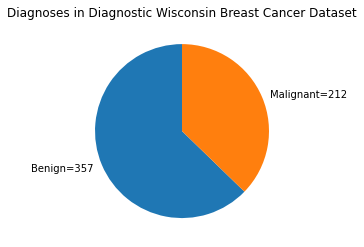

In [4]:
# code taken from Paithankar and Matplotlib Pie Charts links in README
mb_count = df['diagnosis'].value_counts()
# create labels for each diagnosis
mb_b = f'Benign={mb_count[0]}'
mb_m = f'Malignant={mb_count[1]}'
mb_labels = [mb_b,mb_m]
# plot a simple pie chart
plt.pie(mb_count, labels=mb_labels,startangle=90)
plt.title('Diagnoses in Diagnostic Wisconsin Breast Cancer Dataset')
plt.show();

## Statistical Analysis

The above table and pie chart gives us a cursory glance at summarised values, but does not reveal much more than that about each of the variables.

Below are plots containing the means of the spatial variables discussed earlier. Using Seaborn's histogram visual, this data can be quickly plotted and segmented by the particular diagnosis. The aim here is to identify variables that can be used in combination to reliably predict a diagnosis. 

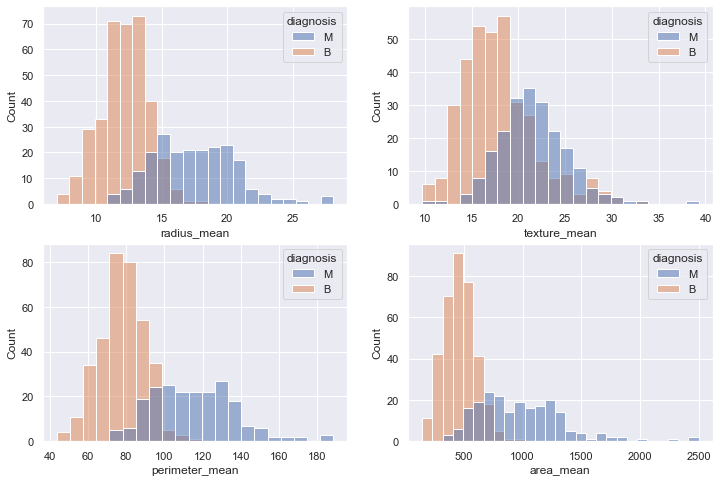

In [10]:
# solution for getting Seaborn histograms to work with subplots comes from Statology links in README
sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

# a plot for each of the spatial variables, separated by diagnosis
sns.histplot(data=df, x='radius_mean', hue='diagnosis',ax=axes[0,0])
sns.histplot(data=df, x='texture_mean', hue='diagnosis',ax=axes[0,1])
sns.histplot(data=df, x='perimeter_mean', hue='diagnosis',ax=axes[1,0])
sns.histplot(data=df, x='area_mean', hue='diagnosis',ax=axes[1,1])
plt.show()

Above we see a fairly consistent amount of overlap between the larger benign results and the smaller malignant results in each variable, except for the texture. For this, there is a more significant overlap, with benign results making up the majority of the lower end of the population, but with the upper two-thirds of the range considerably mixed. Also interesting is the difference in distribution between the two diagnoses across all variables, with benign results often showing a large peak around the mean, while malignant results can be spread more evenly across a wider range. At least one of the results in each variable is approximately normally-distributed or exponentially-distributed ([Kalshtein](https://rpubs.com/Yael_K/329390), 2017).

Also worth quickly worth noting is the cross-correlation between these variables. We see very strong positive correlation between the radius, perimeter and area, which makes sense due to these all being area- or length-based values.

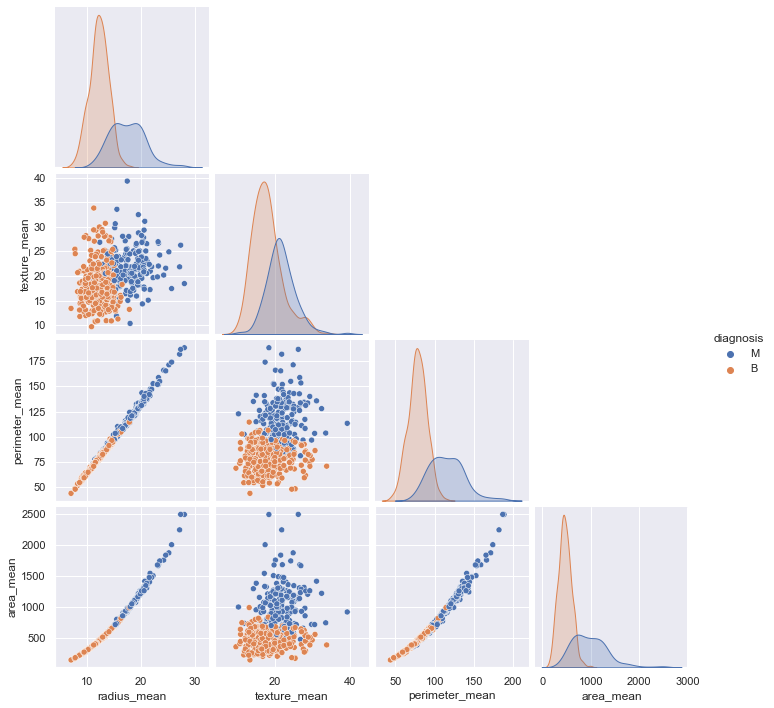

In [7]:
sns.pairplot(data=frame,hue='diagnosis',corner=True)

Next are the remaining six mean variables

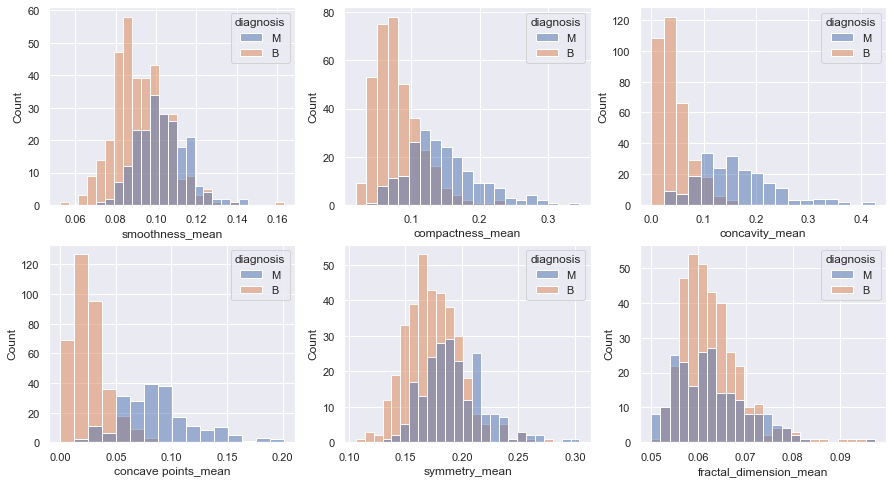

In [8]:
# ratio means

sns.set(rc={"figure.figsize":(15, 8)})
fig, axes = plt.subplots(2, 3)

sns.histplot(data=df, x='smoothness_mean', hue='diagnosis',ax=axes[0,0])
sns.histplot(data=df, x='compactness_mean', hue='diagnosis',ax=axes[0,1])
sns.histplot(data=df, x='concavity_mean', hue='diagnosis',ax=axes[0,2])
sns.histplot(data=df, x='concave points_mean', hue='diagnosis',ax=axes[1,0])
sns.histplot(data=df, x='symmetry_mean', hue='diagnosis',ax=axes[1,1])
sns.histplot(data=df, x='fractal_dimension_mean', hue='diagnosis',ax=axes[1,2])

plt.show()

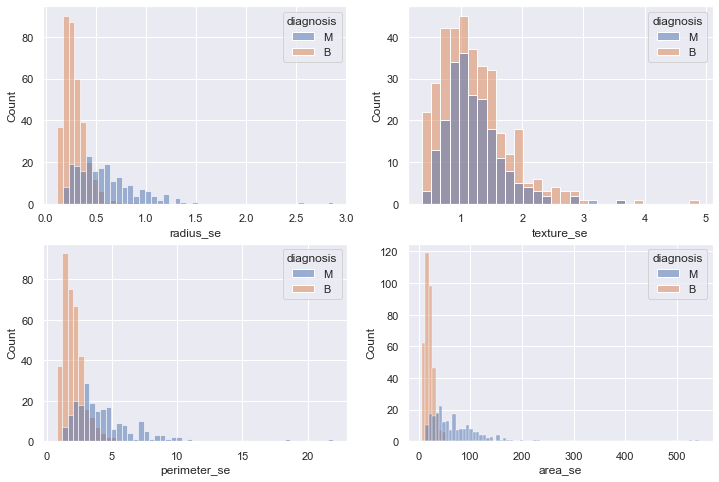

In [9]:
# spatial errors

sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

sns.histplot(data=df, x='radius_se', hue='diagnosis',ax=axes[0,0])
sns.histplot(data=df, x='texture_se', hue='diagnosis',ax=axes[0,1])
sns.histplot(data=df, x='perimeter_se', hue='diagnosis',ax=axes[1,0])
sns.histplot(data=df, x='area_se', hue='diagnosis',ax=axes[1,1])

plt.show()

- review
- does the literature assign particular distributions to these values?

In [ ]:
# ratio errors

sns.set(rc={"figure.figsize":(15, 8)})
fig, axes = plt.subplots(2, 3)

sns.histplot(data=df, x='smoothness_se', hue='diagnosis',ax=axes[0,0])
sns.histplot(data=df, x='compactness_se', hue='diagnosis',ax=axes[0,1])
sns.histplot(data=df, x='concavity_se', hue='diagnosis',ax=axes[0,2])
sns.histplot(data=df, x='concave points_se', hue='diagnosis',ax=axes[1,0])
sns.histplot(data=df, x='symmetry_se', hue='diagnosis',ax=axes[1,1])
sns.histplot(data=df, x='fractal_dimension_se', hue='diagnosis',ax=axes[1,2])

plt.show()

- review
- does the literature assign particular distributions to these values?

In [ ]:
# spatial worsts

sns.set(rc={"figure.figsize":(12, 8)})
fig, axes = plt.subplots(2, 2)

sns.histplot(data=df, x='radius_worst', hue='diagnosis',ax=axes[0,0])
sns.histplot(data=df, x='texture_worst', hue='diagnosis',ax=axes[0,1])
sns.histplot(data=df, x='perimeter_worst', hue='diagnosis',ax=axes[1,0])
sns.histplot(data=df, x='area_worst', hue='diagnosis',ax=axes[1,1])

plt.show()

In [ ]:
- review
- does the literature assign particular distributions to these values?

In [ ]:
# ratio worsts

frame = df[['diagnosis',
    'smoothness_worst','compactness_worst','concavity_worst',
    'concave points_worst','symmetry_worst','fractal_dimension_worst']]

sns.set(rc={"figure.figsize":(15, 8)})
fig, axes = plt.subplots(2, 3)

sns.histplot(data=frame, x='smoothness_worst', hue='diagnosis',ax=axes[0,0])
sns.histplot(data=frame, x='compactness_worst', hue='diagnosis',ax=axes[0,1])
sns.histplot(data=frame, x='concavity_worst', hue='diagnosis',ax=axes[0,2])
sns.histplot(data=frame, x='concave points_worst', hue='diagnosis',ax=axes[1,0])
sns.histplot(data=frame, x='symmetry_worst', hue='diagnosis',ax=axes[1,1])
sns.histplot(data=frame, x='fractal_dimension_worst', hue='diagnosis',ax=axes[1,2])

plt.show()

- review
- does the literature assign particular distributions to these values?

## Existing Literature

- Provide a literature review on classifiers which have been applied to the dataset and compare their performance

- SS - this only needs to be a high-level review of a couple of classifiers in plain English rather than anything in real depth and using lots of technical or scientific language

## Classifier Training

- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers

- SS - examples of algorithms we've used so far are Nearest Neighbours
- SS - pick a few examples and test them, especially if they've been mentioned previously in literature

## Performance Versus Previous Models

- Compare, contrast and critique your results with reference to the literature

- SS - how did something run when you did it, as opposed to the literature's results? chances are it won't get as strong as a result as somebody who is doing actual research, but you can still compare and contrast

## Data Synthesis

- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- SS - this is quite a small dataset, so in a real-world scenario you'd be looking at synthesising some data to enable a machine to better learn from it